In [17]:
from datetime import datetime
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

assets_group = {'btc': ['btc'], 'nft':['theta', 'mana', 'flow'], 'exchange':['bnb', 'okb', 'ht']}
price_24h_change_all = []
index = []

url = 'https://data.messari.io/api/v1/assets/{assetKey}/metrics/price/time-series'
parameters = {
  'start':'2021-01-01',
  'end':'2021-04-11',
  'interval':'1d'
}
headers = {
  'Accepts': 'application/json',
}

session = Session()
session.headers.update(headers)
for key, assets in assets_group.items():
  for asset in assets:
    try:
      response = session.get(url.format(assetKey=asset), params=parameters)
      historical_price_json = json.loads(response.text)
      historical_price = historical_price_json['data']['values']
      price_24h_change_all.append({str(datetime.fromtimestamp(price[0]/1e3)): (price[4] - price[1])/price[1] for price in historical_price})
      index.append(asset)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

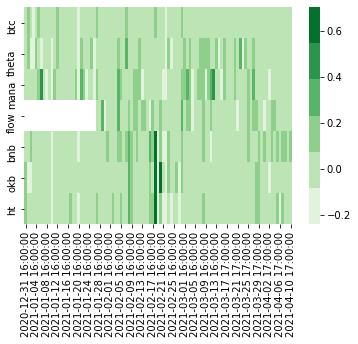

In [18]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(price_24h_change_all, index=index)
colormap = sns.color_palette("Greens")
p1 = sns.heatmap(df, cmap=colormap)